# MDS Feature Selection by Stepwise Regression & PCA
### 賴昱瑋, 2020

- Packages: pandas, numpy, matplotlib, random, sklearn, statsmodels.api
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

steelplates = pd.read_excel('02.1_Steelplates.xlsx', 'Faults', header = None)
col_name = pd.read_excel('02.1_Steelplates.xlsx', 'Var_Name', header = None)
steelplates.columns = col_name[0].tolist()
steelplates.head().transpose()

,0,1,2,3,4
X_Minimum,42.0000,6.450000e+02,8.290000e+02,853.0000,1289.0000
X_Maximum,50.0000,6.510000e+02,8.350000e+02,860.0000,1306.0000
Y_Minimum,270900.0000,2.538079e+06,1.553913e+06,369370.0000,498078.0000
Y_Maximum,270944.0000,2.538108e+06,1.553931e+06,369415.0000,498335.0000
Pixels_Areas,267.0000,1.080000e+02,7.100000e+01,176.0000,2409.0000
X_Perimeter,17.0000,1.000000e+01,8.000000e+00,13.0000,60.0000
Y_Perimeter,44.0000,3.000000e+01,1.900000e+01,45.0000,260.0000
Sum_of_Luminosity,24220.0000,1.139700e+04,7.972000e+03,18996.0000,246930.0000
Minimum_of_Luminosity,76.0000,8.400000e+01,9.900000e+01,99.0000,37.0000
Maximum_of_Luminosity,108.0000,1.230000e+02,1.250000e+02,126.0000,126.0000


In [2]:
for i in range(27, 34):
    steelplates.iloc[:,[i]] = steelplates.iloc[:,[i]].astype('category')
    print(steelplates.iloc[:,[i]].dtypes)

Pastry    category
dtype: object
Z_Scratch    category
dtype: object
K_Scatch    category
dtype: object
Stains    category
dtype: object
Dirtiness    category
dtype: object
Bumps    category
dtype: object
Other_Faults    category
dtype: object


In [3]:
steelplates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X_Minimum              1941 non-null   int64   
 1   X_Maximum              1941 non-null   int64   
 2   Y_Minimum              1941 non-null   int64   
 3   Y_Maximum              1941 non-null   int64   
 4   Pixels_Areas           1941 non-null   int64   
 5   X_Perimeter            1941 non-null   int64   
 6   Y_Perimeter            1941 non-null   int64   
 7   Sum_of_Luminosity      1941 non-null   int64   
 8   Minimum_of_Luminosity  1941 non-null   int64   
 9   Maximum_of_Luminosity  1941 non-null   int64   
 10  Length_of_Conveyer     1941 non-null   int64   
 11  TypeOfSteel_A300       1941 non-null   int64   
 12  TypeOfSteel_A400       1941 non-null   int64   
 13  Steel_Plate_Thickness  1941 non-null   int64   
 14  Edges_Index            1941 non-null   f

---
## 2.1 PCA - Faulty Steel Plates

### (a) Logistic Regression to predict 'Bumps'

- Reference:
    * https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31
    * https://www.statsmodels.org/stable/glm.html

In [4]:
import seaborn as sns
import statsmodels.api as sm

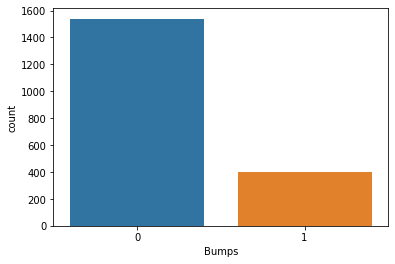

In [5]:
sns.countplot(steelplates['Bumps'])

In [6]:
# Build up the logistic regression by sklearn
# Only consider the 'Bumps'

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    steelplates.iloc[:, 0:27], steelplates['Bumps'], test_size=0.3, random_state=10)

In [7]:
logistic_regr = LogisticRegression()
logistic_regr.fit(X_train, y_train)

predictions = logistic_regr.predict(X_test)

print('\nCoefficients:', logistic_regr.coef_)
print('\nIntercept:', logistic_regr.intercept_)
print('\nPredictions for the testing set: \n', predictions)


Coefficients: [[ 2.35520165e-04  2.34779596e-04  1.75775072e-05 -1.74126580e-05
  -3.73935094e-05 -1.89705309e-05 -3.10348261e-05 -7.11567880e-06
  -1.10641741e-04 -1.13817406e-04 -9.47654044e-04  7.19105408e-07
  -1.56111819e-06 -1.06733847e-04  1.39822302e-07 -4.06726425e-07
   8.59256543e-08 -1.78913744e-09 -3.44764365e-07 -6.68800077e-07
  -6.87217996e-07 -1.51206115e-06 -6.90708600e-07 -1.05907868e-06
  -4.54598780e-07 -3.47096012e-08 -3.57739056e-07]]

Intercept: [-8.42012784e-07]

Predictions for the testing set: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       464
           1       0.22      0.02      0.03       119

    accuracy                           0.79       583
   macro avg       0.51      0.50      0.46       583
weighted avg       0.68      0.79      0.71       583



- The result shows that the accuracy is 0.79

#### The Confusion Matrix:

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[457   7]
 [117   2]]


---
### (b) Excludes variables for PCA Analysis

- All defect types should be removed. The responses should be removed because PCA is not interested in the relationship toward the response, but the relationship between dependent variables.
 
- Binary variables should be removed because when doing PCA, we are adjusting the dimension of combination of variables. The binary had only two values and it might be meaningless to do PCA. That is, 'Outside_Global_Index', 'TypeOfSteel_A400', and 'TypeOfSteel_A300'.

In [10]:
steelplates_forPC = steelplates.loc[:, ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 
       'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 
       'Orientation_Index', 'Luminosity_Index','SigmoidOfAreas']]

corr_matrix = steelplates_forPC.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


---
### (c) Calculate the eigenvalues and eigenvectors
- Reference:
    - https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors/

In [11]:
from scipy.linalg import eig

eigval, eigvect = eig(corr_matrix.to_numpy())

print('eigenvalue of the covariance matrix:\n', eigval, '\n')
print('eigenvectors of the covariance matrix:\n', eigvect)

eigenvalue of the covariance matrix:
 [8.01990271e+00+0.j 2.92771690e+00+0.j 2.31491383e+00+0.j
 2.19870120e+00+0.j 1.75243024e+00+0.j 1.53965861e+00+0.j
 9.57408825e-01+0.j 9.22330947e-01+0.j 8.70376053e-01+0.j
 7.35345459e-01+0.j 6.05587150e-01+0.j 3.47235857e-01+0.j
 2.94554653e-01+0.j 1.98228097e-01+0.j 1.05680899e-01+0.j
 8.04776492e-02+0.j 5.71640978e-02+0.j 4.58433089e-02+0.j
 1.70906930e-02+0.j 7.46256882e-03+0.j 1.38351561e-03+0.j
 4.94083503e-04+0.j 1.26459250e-05+0.j 2.93564634e-11+0.j] 

eigenvectors of the covariance matrix:
 [[-1.85984677e-01  1.13837043e-01  7.03058024e-02 -3.11227746e-01
   6.91783248e-02 -5.09683204e-01 -2.29851779e-02 -1.46366652e-01
  -1.57845597e-01  4.44642363e-02 -8.61071726e-02  1.01749862e-01
  -1.91234136e-03 -2.94433206e-02 -4.30848472e-02  4.58959948e-03
   1.13695359e-02 -9.62328874e-03  8.47789562e-03  4.87729999e-03
  -1.61324795e-02  9.43049635e-03 -7.18370807e-01 -1.68456075e-04]
 [-1.50468255e-01  9.48681062e-02  9.10465464e-02 -3.18664

---
### (d) Scree Plot
- Reference:
    * https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python

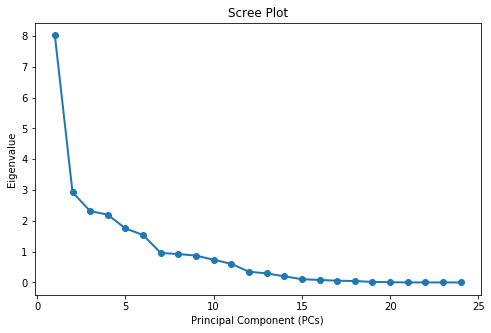

In [12]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(24) + 1, eigval, 'o-', linewidth = 2) # 24 Variables
plt.title('Scree Plot')
plt.xlabel('Principal Component (PCs)')
plt.ylabel('Eigenvalue')
plt.show()

- Best number for using PCs is 14

---
### (e) Use selected PCs and perform Logistics Regression

In [13]:
eigvect0 = eigvect[:,:14]
 
 # The PCs transformed components
steelplates_pcs = np.dot(steelplates_forPC, eigvect0)

In [14]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(
    steelplates_pcs, steelplates['Bumps'], test_size = 0.3, random_state = 10)

logistic_regr0 = LogisticRegression()
logistic_regr0.fit(X_train0, y_train0)

predictions0 = logistic_regr0.predict(X_test0)

print('\nCoefficients:', logistic_regr0.coef_)
print('\nIntercept:', logistic_regr0.intercept_)
print('\nPredictions for the testing set: \n', predictions0)


Coefficients: [[ 1.45950241e-05 -3.51428068e-05  9.25905707e-05  5.66664634e-05
  -1.36811019e-04 -8.52663192e-05  1.62392987e-04 -6.05234861e-04
  -5.16464742e-04 -2.38437160e-04 -5.18911410e-04  1.07672922e-04
  -8.84168724e-06 -9.12529279e-05]]

Intercept: [-8.44431335e-07]

Predictions for the testing set: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [15]:
print(classification_report(y_test0,predictions0))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       464
           1       0.22      0.02      0.03       119

    accuracy                           0.79       583
   macro avg       0.51      0.50      0.46       583
weighted avg       0.68      0.79      0.71       583



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test0,predictions0))

[[457   7]
 [117   2]]


---
### (f) Conclusion: compare (a) and (e)

There is no significant difference between the results from (a) and (e). It might because the results of 'Bumps' are skew and most of them are 0. Therefore, both of the models can easily predict correctly.

---
## 2. Stepwise Regression for Variable Selection

### (1) Identify the important variables by linear Regression
- References:
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    * https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [17]:
import statsmodels.api as sm

X = steelplates.iloc[:, 0:27]
y = steelplates['Bumps']

reg = sm.OLS(y, X).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bumps   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     22.46
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           8.12e-92
Time:                        03:38:51   Log-Likelihood:                -742.48
No. Observations:                1941   AIC:                             1539.
Df Residuals:                    1914   BIC:                             1689.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
X_Minimum                 0.00

### From the report , we can find out:
### P-values:
- Variables with P-value is almost 0 (which is veery signiificant): Y_Perimeter, TypeOfSteel_A300, TypeOfSteel_A400, Edges_Index, Square_Index, Edges_Y_Index
- Variables which is less significant than those listed above with small P-value (p <= 0.05): X_Perimeter, Length_of_Conveyer, Luminosity_Index, Y_Minimum, Y_Maximum

### By comparing t-values, we can rank variables which are more significant:

|Variable|t-value|
| :----- | ----: |
|Square_Index|7.691|
|TypeOfSteel_A400|5.603|
|Edges_Index|5.213|
|TypeOfSteel_A300|5.016|
|Edges_Y_Index|4.218|
|Y_Perimeter|3.536|
|Length_of_Conveyer|3.478|
|X_Perimeter|3.396|
|Luminosity_Index|2.857|
|Y_Minimum|2.803|

---
### (2) Identify the important variable by stepwise regression

By the method forward stepwise selection

In [18]:
forward_select = []
current_aic = 0

for variable in X:
    forward_consider = forward_select + [variable]
    step_reg = sm.OLS(y, X.loc[:, forward_consider]).fit()
    
    if step_reg.aic > current_aic:
        forward_select = forward_select + [variable]
        current_aic = step_reg.aic

print("Selected Variables:", forward_select, "\nAIC:", current_aic)
print(step_reg.summary())

Selected Variables: ['X_Minimum', 'X_Maximum', 'Pixels_Areas', 'Y_Perimeter', 'Sum_of_Luminosity', 'Orientation_Index'] 
AIC: 1977.5368705068167
                                 OLS Regression Results                                
Dep. Variable:                  Bumps   R-squared (uncentered):                   0.230
Model:                            OLS   Adj. R-squared (uncentered):              0.228
Method:                 Least Squares   F-statistic:                              82.76
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                   2.08e-105
Time:                        03:38:51   Log-Likelihood:                         -971.82
No. Observations:                1941   AIC:                                      1958.
Df Residuals:                    1934   BIC:                                      1997.
Df Model:                           7                                                  
Covariance Type:            nonrobust                          

- X_Minimum, X_Maximum, Pixels_Areas, Y_Perimeter, Sum_of_Luminosity, Orientation_Index, SigmoidOfAreas 7 variables are selected in the model 2.

---
### (3) Comparison between (1) and (2)

Both model is significant with p-value is almost 0. The Adj. R-squared is 0.228 for the stepwise model, which is slightly larger than the full model 0.223. It is not necessary to include all variables in the regression. The AIC of stepwise model is much larger than the full model. Therefore, the (2) stepwise model is better than the (1) full model.

In (2), only X_Minimum, X_Maximum, Pixels_Areas, Y_Perimeter, Sum_of_Luminosity, Orientation_Index, SigmoidOfAreas 7 variables are included. However, most of these variables are not selected (1) by p-value such as X_Minimum, X_Maximum, Pixels_Areas, Sum_of_Luminosity, Orientation_Index, and SigmoidOfAreas. This result might imply that some of the variables in model 1 might highly correlated and have some overlayed effect on the responce Bumps.
